In [1]:
# Cleaning of the data 

In [63]:
import pandas as pd
import regex as re
# Load the data
file_path = 'realtor_dataset_copy.csv'
df = pd.read_csv(file_path)

# Get summary statistics
df.describe()


,Transit Score,Bathroom,Deposit,Livability Score,Total SqFt
count,4994.000000,5190.000000,5.191000e+03,4994.000000,5191.000000
mean,6.823468,1.677071,1.912115e+05,7.108811,910.394144
std,2.090541,1.114626,3.781218e+05,1.367187,762.983558
min,0.100000,1.000000,1.000000e+00,1.500000,40.000000
25%,6.300000,1.000000,5.000000e+04,6.200000,500.000000
50%,7.600000,2.000000,1.000000e+05,6.800000,800.000000
75%,8.300000,2.000000,2.000000e+05,8.200000,1200.000000
max,9.600000,50.000000,1.000000e+07,9.700000,35000.000000


In [64]:
df.columns

Index(['Age of Building', 'Water Supply', 'Rent', 'Transit Score',
       'Smoking Allowed', 'Location', 'Bathroom', 'Non-Veg Allowed',
       'Posted On', 'Parking', 'Property Type', 'Furnishing Status',
       'No. of Bedroom', 'Facing', 'Gated Security', 'Deposit',
       'Attached Bathroom', 'Livability Score', 'Balcony', 'URL',
       'Drinking Allowed', 'Possession', 'Total SqFt', 'AC', 'Floor',
       'Preferred Tenant', 'Room Type'],
      dtype='object')

In [65]:
df.isnull().sum()

Age of Building        13
Water Supply         2021
Rent                   13
Transit Score         210
Smoking Allowed      5203
Location                0
Bathroom               14
Non-Veg Allowed        13
Posted On              13
Parking                13
Property Type          13
Furnishing Status      13
No. of Bedroom         14
Facing               2239
Gated Security         13
Deposit                13
Attached Bathroom    5203
Livability Score      210
Balcony              2918
URL                     0
Drinking Allowed     5203
Possession             13
Total SqFt             13
AC                   5203
Floor                  13
Preferred Tenant       13
Room Type            5203
dtype: int64

In [66]:
# Remove columns with 5203 null values
columns_to_remove = df.columns[df.isnull().sum() == 5203]
df_cleaned = df.drop(columns=columns_to_remove)

# Display the remaining columns
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5204 entries, 0 to 5203
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age of Building    5191 non-null   object 
 1   Water Supply       3183 non-null   object 
 2   Rent               5191 non-null   object 
 3   Transit Score      4994 non-null   float64
 4   Location           5204 non-null   object 
 5   Bathroom           5190 non-null   float64
 6   Non-Veg Allowed    5191 non-null   object 
 7   Posted On          5191 non-null   object 
 8   Parking            5191 non-null   object 
 9   Property Type      5191 non-null   object 
 10  Furnishing Status  5191 non-null   object 
 11  No. of Bedroom     5190 non-null   object 
 12  Facing             2965 non-null   object 
 13  Gated Security     5191 non-null   object 
 14  Deposit            5191 non-null   float64
 15  Livability Score   4994 non-null   float64
 16  Balcony            2286 

In [67]:
df_cleaned['No. of Bedroom']

0       1 Bedroom
1       1 Bedroom
2       3 Bedroom
3             NaN
4       3 Bedroom
          ...    
5199    1 Bedroom
5200    1 Bedroom
5201    1 Bedroom
5202    1 Bedroom
5203    3 Bedroom
Name: No. of Bedroom, Length: 5204, dtype: object

In [69]:
import regex as re
# Convert the 'No. of Bedroom' column to string
df_cleaned['No. of Bedroom'] = df_cleaned['No. of Bedroom'].astype(str)

# Use regex to extract the number from the 'No. of Bedroom' column
df_cleaned['No. of Bedroom'] = df_cleaned['No. of Bedroom'].apply(lambda x: re.search(r'\d+', x).group() if re.search(r'\d+', x) else None)

# Convert the extracted values to numeric (integers)
df_cleaned['No. of Bedroom'] = pd.to_numeric(df_cleaned['No. of Bedroom'], errors='coerce')

# Display the updated column
df_cleaned['No. of Bedroom'].head(10)

0    1.0
1    1.0
2    3.0
3    NaN
4    3.0
5    2.0
6    1.0
7    2.0
8    1.0
9    1.0
Name: No. of Bedroom, dtype: float64

In [74]:
df_cleaned['Floor']

0       1/4
1       0/2
2       1/2
3       NaN
4       1/2
       ... 
5199    0/3
5200    1/2
5201    2/3
5202    1/2
5203    2/4
Name: Floor, Length: 5204, dtype: object

In [71]:
df.isnull().sum()

Age of Building        13
Water Supply         2021
Rent                   13
Transit Score         210
Smoking Allowed      5203
Location                0
Bathroom               14
Non-Veg Allowed        13
Posted On              13
Parking                13
Property Type          13
Furnishing Status      13
No. of Bedroom         14
Facing               2239
Gated Security         13
Deposit                13
Attached Bathroom    5203
Livability Score      210
Balcony              2918
URL                     0
Drinking Allowed     5203
Possession             13
Total SqFt             13
AC                   5203
Floor                  13
Preferred Tenant       13
Room Type            5203
dtype: int64

In [75]:
def process_floor(floor_value):
    if isinstance(floor_value, str) and '/' in floor_value:
        numerator, denominator = floor_value.split('/')
        numerator = int(numerator) + 1
        denominator = int(denominator)
    else:
        numerator = 1
        denominator = 1
    return numerator, denominator

# Apply the function to the 'Floor' column and create new columns
df_cleaned['Floor'], df_cleaned['Total Floors'] = zip(*df_cleaned['Floor'].apply(process_floor))

# Display the first few rows to verify the changes
df_cleaned[['Floor', 'Total Floors']].head(10)

,Floor,Total Floors
0,2,4
1,1,2
2,2,2
3,1,1
4,2,2
5,3,2
6,4,3
7,1,4
8,2,4
9,3,2


In [76]:
df_cleaned = df_cleaned.dropna(axis=1, thresh=len(df_cleaned) - 5203)

# Display the remaining columns
df_cleaned.columns

Index(['Age of Building', 'Water Supply', 'Rent', 'Transit Score', 'Location',
       'Bathroom', 'Non-Veg Allowed', 'Posted On', 'Parking', 'Property Type',
       'Furnishing Status', 'No. of Bedroom', 'Facing', 'Gated Security',
       'Deposit', 'Livability Score', 'Balcony', 'URL', 'Possession',
       'Total SqFt', 'Floor', 'Preferred Tenant', 'Total Floors'],
      dtype='object')

In [77]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5204 entries, 0 to 5203
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age of Building    5191 non-null   object 
 1   Water Supply       3183 non-null   object 
 2   Rent               5191 non-null   object 
 3   Transit Score      4994 non-null   float64
 4   Location           5204 non-null   object 
 5   Bathroom           5190 non-null   float64
 6   Non-Veg Allowed    5191 non-null   object 
 7   Posted On          5191 non-null   object 
 8   Parking            5191 non-null   object 
 9   Property Type      5191 non-null   object 
 10  Furnishing Status  5191 non-null   object 
 11  No. of Bedroom     5190 non-null   float64
 12  Facing             2965 non-null   object 
 13  Gated Security     5191 non-null   object 
 14  Deposit            5191 non-null   float64
 15  Livability Score   4994 non-null   float64
 16  Balcony            2286 

In [78]:
df_cleaned['Rent']

0        7500\n+
1          18000
2          40000
3            NaN
4          40000
          ...   
5199        4500
5200        5000
5201        9000
5202        9500
5203    60000\n+
Name: Rent, Length: 5204, dtype: object

In [79]:
df_cleaned['Rent'] = df_cleaned['Rent'].astype(str)

# Function to extract numbers from the 'Rent' column using regex
def extract_rent_value(rent_value):
    match = re.search(r'\d+', rent_value)
    if match:
        return int(match.group())
    else:
        return None  # This will be treated as NaN

# Apply the function to the 'Rent' column
df_cleaned['Rent'] = df_cleaned['Rent'].apply(extract_rent_value)

# For 'Deposit', fill with 0 and the rest with NaN
df_cleaned['Deposit'] = df_cleaned['Deposit'].apply(lambda x: 0 if pd.notna(x) else None)

# Display the first few rows to verify the changes
df_cleaned[['Rent', 'Deposit']].head(10)

,Rent,Deposit
0,7500.0,0.0
1,18000.0,0.0
2,40000.0,0.0
3,NaN,NaN
4,40000.0,0.0
5,14000.0,0.0
6,6000.0,0.0
7,23000.0,0.0
8,11000.0,0.0
9,10000.0,0.0


In [82]:
# Convert 'Rent' column to strings and extract numbers
df_cleaned['Rent'] = df_cleaned['Rent'].astype(str).apply(lambda x: re.search(r'\d+', x).group() if re.search(r'\d+', x) else None)
df_cleaned['Rent'] = pd.to_numeric(df_cleaned['Rent'], errors='coerce')

# Function to trim extreme values
def trim_extremes(df, column, lower_percent, upper_percent):
    # Drop rows with NaN in the specified column
    df = df.dropna(subset=[column])
    
    # Calculate the lower and upper thresholds
    lower_threshold = df[column].quantile(lower_percent)
    upper_threshold = df[column].quantile(1 - upper_percent)
    
    # Filter the dataframe to remove outliers
    filtered_df = df[(df[column] >= lower_threshold) & (df[column] <= upper_threshold)]
    
    return filtered_df

# Function to display average and median rent by location
def display_location_stats(df, column):
    location_stats = df.groupby('Location')[column].agg(['mean', 'median'])
    print("\nAverage and Median Rent by Location:\n")
    print(location_stats)

# Define a function for interactive trimming
def interactive_trimming(df, column, lower_percent=0.01, upper_percent=0.01):
    while True:
        print(f"\nTrimming {lower_percent * 100}% from the lower end and {upper_percent * 100}% from the upper end.")
        df_filtered = trim_extremes(df, column, lower_percent, upper_percent)
        
        # Display some statistics to help assess the results
        print(f"\nOriginal number of rows: {len(df)}")
        print(f"Number of rows after trimming: {len(df_filtered)}")
        print(df_filtered[column].describe())
        
        # Display average and median rent by location
        display_location_stats(df_filtered, column)
        
        # Ask if the user wants to adjust the percentages
        adjust = input("\nWould you like to adjust the trimming percentages? (y/n): ").lower()
        if adjust == 'y':
            lower_percent = float(input("Enter new lower percent (as a decimal, e.g., 0.01): "))
            upper_percent = float(input("Enter new upper percent (as a decimal, e.g., 0.01): "))
        else:
            break

    # Ask if the user wants to apply the changes to the original dataset
    apply_changes = input("\nApply these changes to the original dataset? (y/n): ").lower()
    if apply_changes == 'y':
        return df_filtered
    else:
        return df  # Return the original dataframe unchanged

# Example of using the interactive trimming function
df_cleaned = interactive_trimming(df_cleaned, 'Rent')


Trimming 1.0% from the lower end and 1.0% from the upper end.

Original number of rows: 5204
Number of rows after trimming: 4825
count      4825.000000
mean      23288.757720
std       16332.005581
min        4000.000000
25%       12000.000000
50%       18000.000000
75%       30000.000000
max      120000.000000
Name: Rent, dtype: float64

Average and Median Rent by Location:

                          mean   median
Location                               
Electronic city   20265.888720  16000.0
Gandhinagar       20008.847095  15000.0
HSR Layout        28985.429612  25000.0
Indiranagar       36790.000000  25250.0
Jayanagar         26067.198925  22000.0
Koramangala       27935.047794  20000.0
Krishnarajapura   19110.091038  15000.0
Malleshwaram      20615.731481  18000.0
Marathahalli      20417.198251  16500.0
Padmanabhanagara  13864.031250  11000.0
Whitefield        29216.126551  25000.0
Yelahanka         21193.750000  15000.0

Would you like to adjust the trimming percentages? (y/n): y

In [85]:
# Convert 'Rent' column to strings and extract numbers
df_cleaned['Rent'] = df_cleaned['Rent'].astype(str).apply(lambda x: re.search(r'\d+', x).group() if re.search(r'\d+', x) else None)
df_cleaned['Rent'] = pd.to_numeric(df_cleaned['Rent'], errors='coerce')

# Function to trim extreme values
def trim_extremes(df, column, lower_percent, upper_percent):
    # Drop rows with NaN in the specified column
    df = df.dropna(subset=[column])
    
    # Calculate the lower and upper thresholds
    lower_threshold = df[column].quantile(lower_percent)
    upper_threshold = df[column].quantile(1 - upper_percent)
    
    # Filter the dataframe to remove outliers
    filtered_df = df[(df[column] >= lower_threshold) & (df[column] <= upper_threshold)]
    
    return filtered_df

# Function to display average and median rent by location and number of bedrooms
def display_location_and_room_stats(df, column):
    print("\nAverage and Median Rent by Location and Number of Bedrooms:\n")
    location_room_stats = df.groupby(['Location', 'No. of Bedroom'])[column].agg(['mean', 'median']).reset_index()
    print(location_room_stats)

# Define a function for interactive trimming
def interactive_trimming(df, column, lower_percent=0.00, upper_percent=0.00):
    while True:
        print(f"\nTrimming {lower_percent * 100}% from the lower end and {upper_percent * 100}% from the upper end.")
        df_filtered = trim_extremes(df, column, lower_percent, upper_percent)
        
        # Display some statistics to help assess the results
        print(f"\nOriginal number of rows: {len(df)}")
        print(f"Number of rows after trimming: {len(df_filtered)}")
        print(df_filtered[column].describe())
        
        # Display average and median rent by location and number of rooms
        display_location_and_room_stats(df_filtered, column)
        
        # Ask if the user wants to adjust the percentages
        adjust = input("\nWould you like to adjust the trimming percentages? (y/n): ").lower()
        if adjust == 'y':
            lower_percent = float(input("Enter new lower percent (as a decimal, e.g., 0.01): "))
            upper_percent = float(input("Enter new upper percent (as a decimal, e.g., 0.01): "))
        else:
            break

    # Ask if the user wants to apply the changes to the original dataset
    apply_changes = input("\nApply these changes to the original dataset? (y/n): ").lower()
    if apply_changes == 'y':
        return df_filtered
    else:
        return df  # Return the original dataframe unchanged

# Example of using the interactive trimming function
df_cleaned = interactive_trimming(df_cleaned, 'Rent')


Trimming 0.0% from the lower end and 0.0% from the upper end.

Original number of rows: 5204
Number of rows after trimming: 4905
count       4905.000000
mean       25077.935168
std        29249.635276
min            1.000000
25%        12000.000000
50%        18000.000000
75%        30000.000000
max      1000000.000000
Name: Rent, dtype: float64

Average and Median Rent by Location and Number of Bedrooms:

            Location  No. of Bedroom           mean    median
0    Electronic city             1.0    9963.278937    8500.0
1    Electronic city             2.0   21245.405242   20000.0
2    Electronic city             3.0   35615.453237   35000.0
3    Electronic city             4.0   83750.000000   50000.0
4        Gandhinagar             1.0    9278.802920    8500.0
5        Gandhinagar             2.0   21035.854962   17000.0
6        Gandhinagar             3.0   38548.076923   35000.0
7        Gandhinagar             4.0  102937.500000   60000.0
8         HSR Layout           

In [87]:
# Calculate average and median rent by the number of rooms and location
location_room_stats = df_cleaned.groupby(['Location', 'No. of Bedroom'])['Rent'].agg(['mean', 'median']).reset_index()

# Display the results
print(location_room_stats)

            Location  No. of Bedroom           mean    median
0    Electronic city             1.0    9963.278937    8500.0
1    Electronic city             2.0   21245.405242   20000.0
2    Electronic city             3.0   35615.453237   35000.0
3    Electronic city             4.0   83750.000000   50000.0
4        Gandhinagar             1.0    9278.802920    8500.0
5        Gandhinagar             2.0   21035.854962   17000.0
6        Gandhinagar             3.0   38548.076923   35000.0
7        Gandhinagar             4.0  102937.500000   60000.0
8         HSR Layout             1.0   17532.032051   16000.0
9         HSR Layout             2.0   29851.758794   29000.0
10        HSR Layout             3.0   58972.222222   60000.0
11        HSR Layout             4.0  176200.000000  140000.0
12       Indiranagar             1.0   17043.478261   15000.0
13       Indiranagar             2.0   36925.925926   30000.0
14       Indiranagar             3.0   72403.846154   75500.0
15      

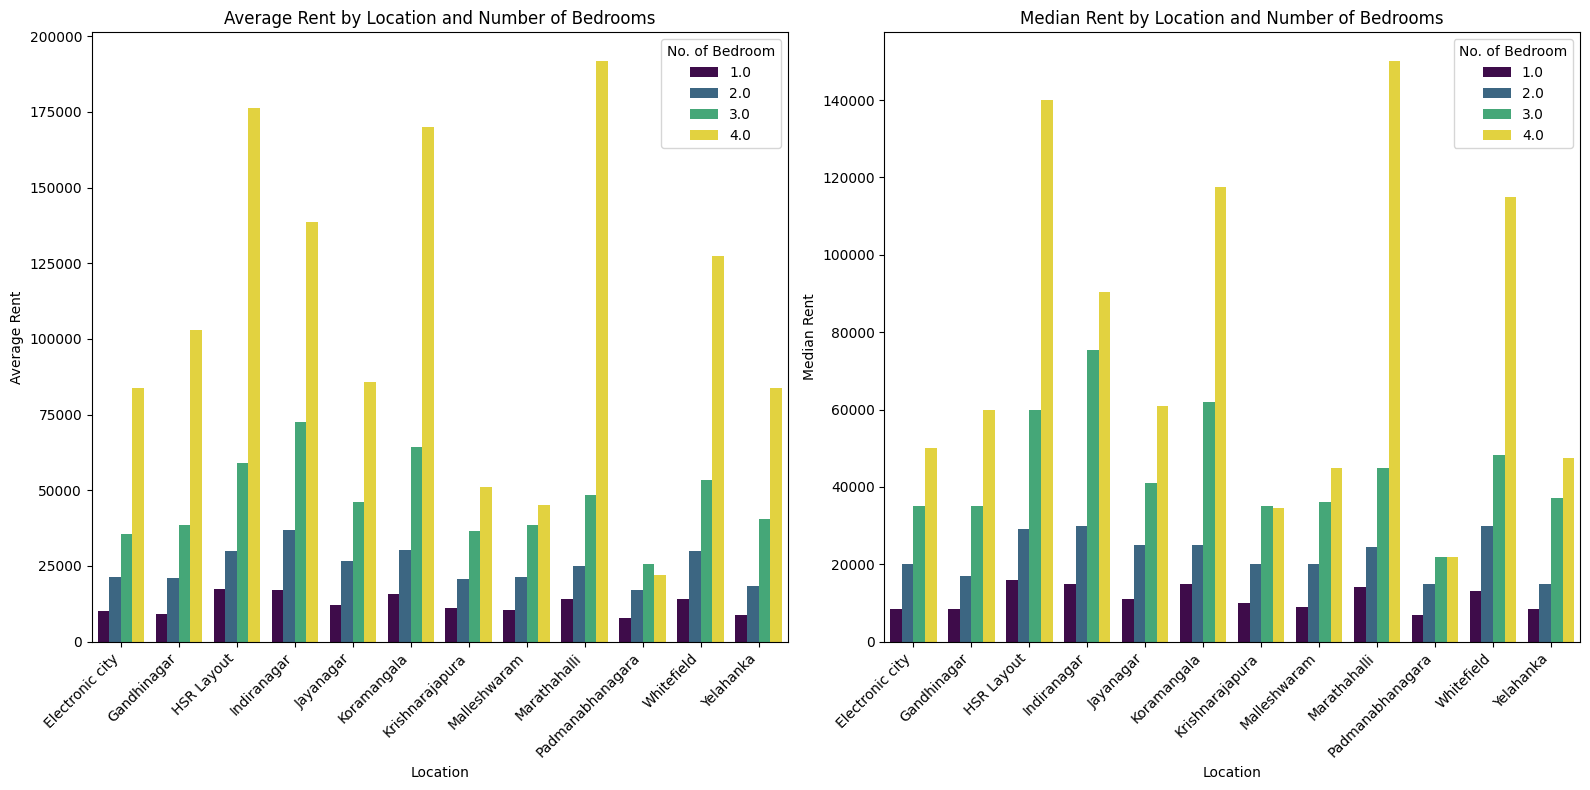

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Rent' column to strings and extract numbers
df_cleaned['Rent'] = df_cleaned['Rent'].astype(str).apply(lambda x: re.search(r'\d+', x).group() if re.search(r'\d+', x) else None)
df_cleaned['Rent'] = pd.to_numeric(df_cleaned['Rent'], errors='coerce')

# Calculate average and median rent by the number of rooms and location
location_room_stats = df_cleaned.groupby(['Location', 'No. of Bedroom'])['Rent'].agg(['mean', 'median']).reset_index()

# Create a visualization
plt.figure(figsize=(16, 8))

# Plot for Average Rent
plt.subplot(1, 2, 1)
sns.barplot(data=location_room_stats, x='Location', y='mean', hue='No. of Bedroom', palette='viridis')
plt.title('Average Rent by Location and Number of Bedrooms')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Rent')

# Plot for Median Rent
plt.subplot(1, 2, 2)
sns.barplot(data=location_room_stats, x='Location', y='median', hue='No. of Bedroom', palette='viridis')
plt.title('Median Rent by Location and Number of Bedrooms')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Median Rent')

plt.tight_layout()
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_8564\733872471.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=location_scores, x='Location', y='Livability Score', palette='coolwarm')
C:\Users\Dell\AppData\Local\Temp\ipykernel_8564\733872471.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=location_scores, x='Location', y='Transit Score', palette='coolwarm')


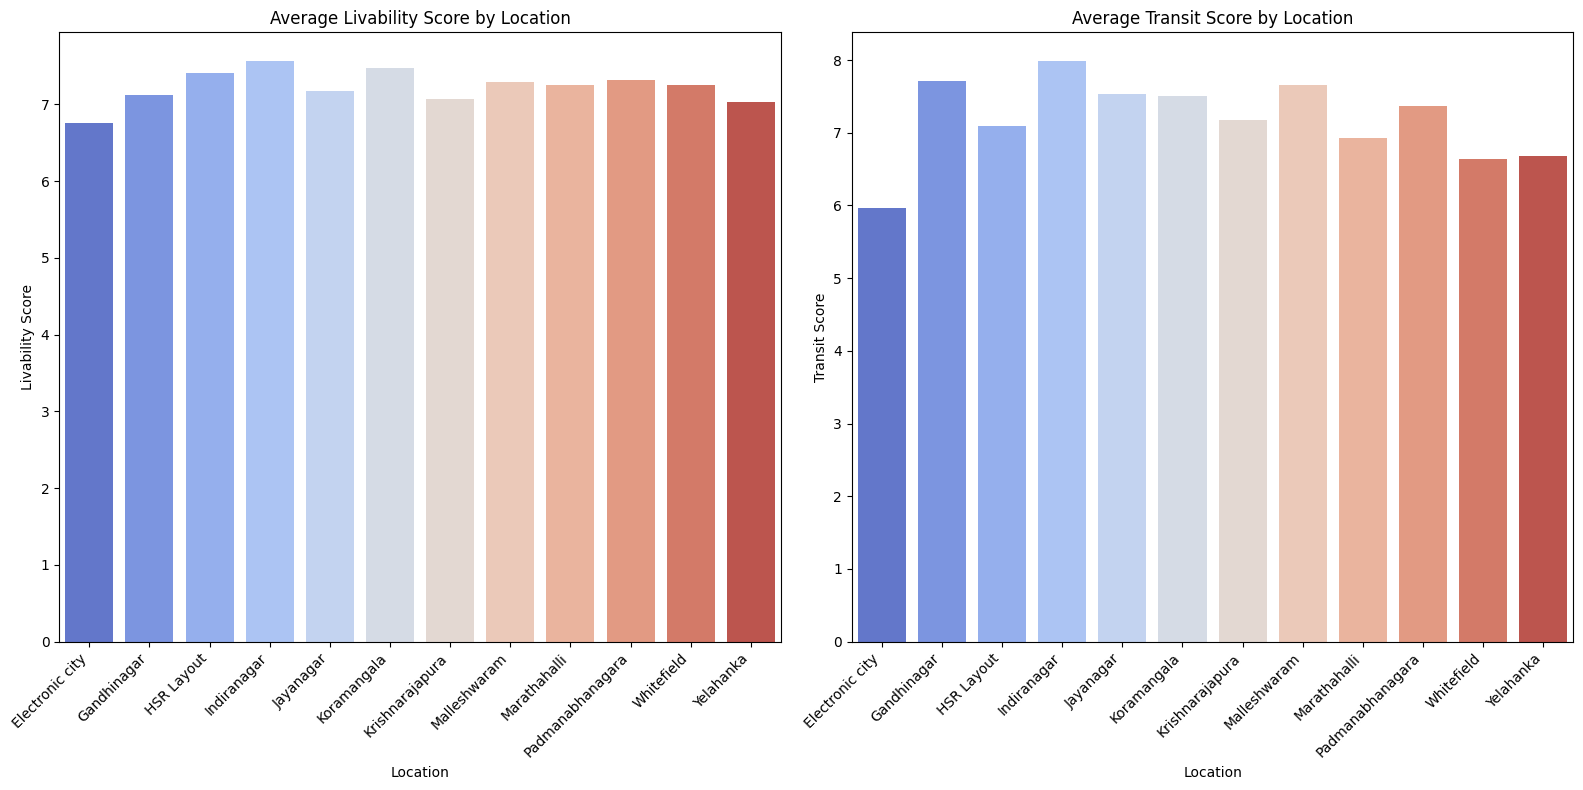

In [89]:
location_scores = df_cleaned.groupby('Location')[['Livability Score', 'Transit Score']].mean().reset_index()

# Create a visualization
plt.figure(figsize=(16, 8))

# Plot for Livability Score
plt.subplot(1, 2, 1)
sns.barplot(data=location_scores, x='Location', y='Livability Score', palette='coolwarm')
plt.title('Average Livability Score by Location')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Livability Score')

# Plot for Transit Score
plt.subplot(1, 2, 2)
sns.barplot(data=location_scores, x='Location', y='Transit Score', palette='coolwarm')
plt.title('Average Transit Score by Location')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Transit Score')

plt.tight_layout()
plt.show()

            Location  No. of Bedroom       Parking  Count
0    Electronic city             1.0          Bike    393
1    Electronic city             1.0  Bike and Car     92
2    Electronic city             1.0           Car     27
3    Electronic city             1.0          None     38
4    Electronic city             2.0          Bike    142
..               ...             ...           ...    ...
162        Yelahanka             3.0  Bike and Car     25
163        Yelahanka             3.0           Car     11
164        Yelahanka             4.0          Bike      1
165        Yelahanka             4.0  Bike and Car      4
166        Yelahanka             4.0           Car      3

[167 rows x 4 columns]


C:\Users\Dell\AppData\Local\Temp\ipykernel_8564\247446822.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=parking_availability, x='Location', y='Count', hue='Parking', palette='Set2', ci=None)
C:\Users\Dell\AppData\Local\Temp\ipykernel_8564\247446822.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(data=parking_availability, x='Location', y='Count', hue='Parking', col='No. of Bedroom',


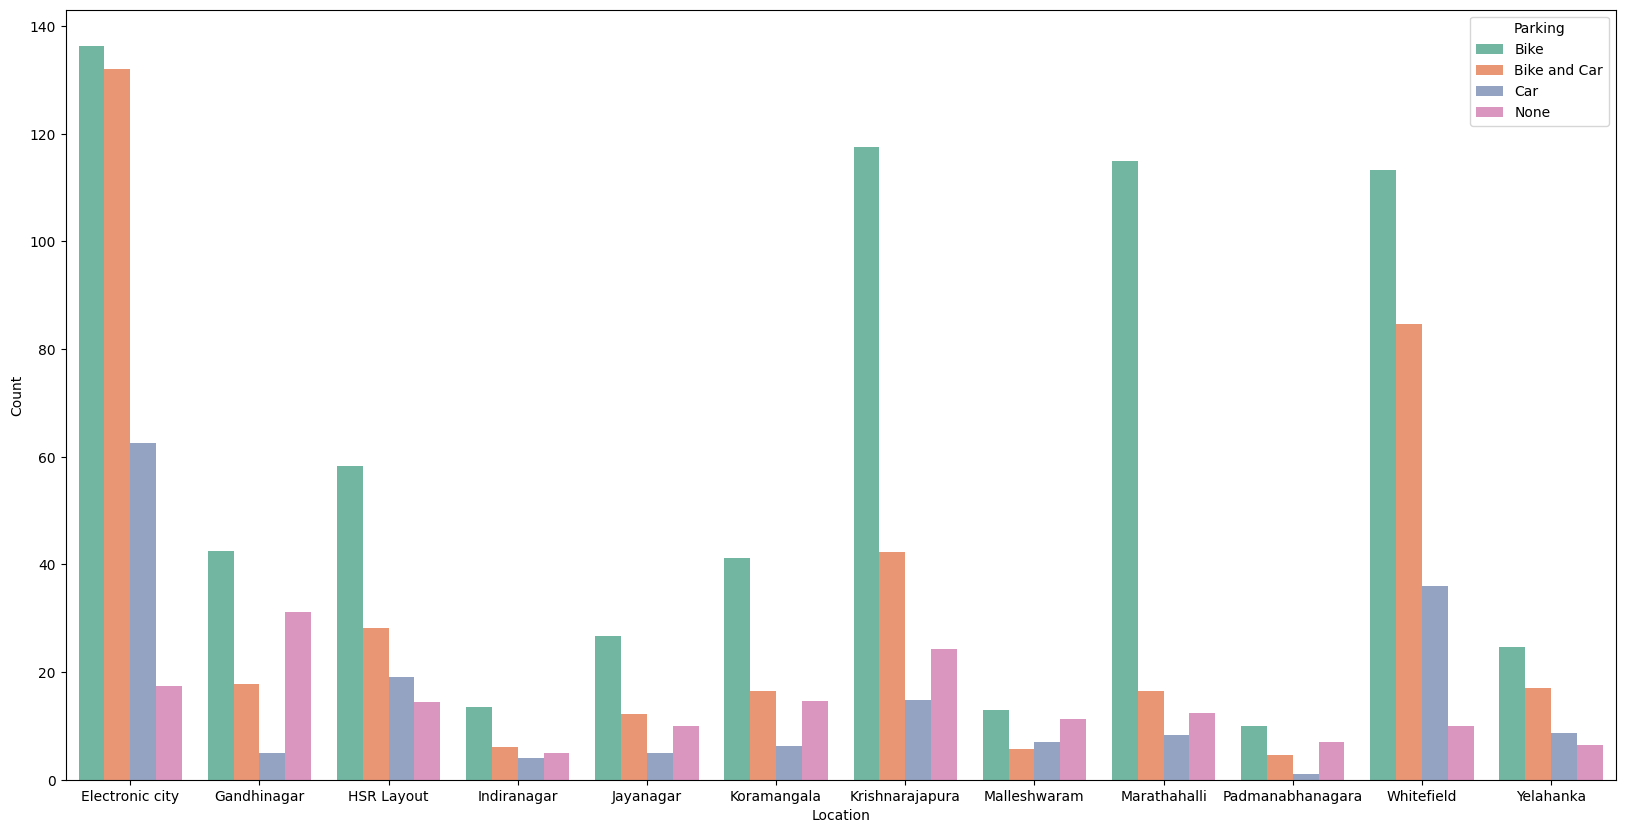

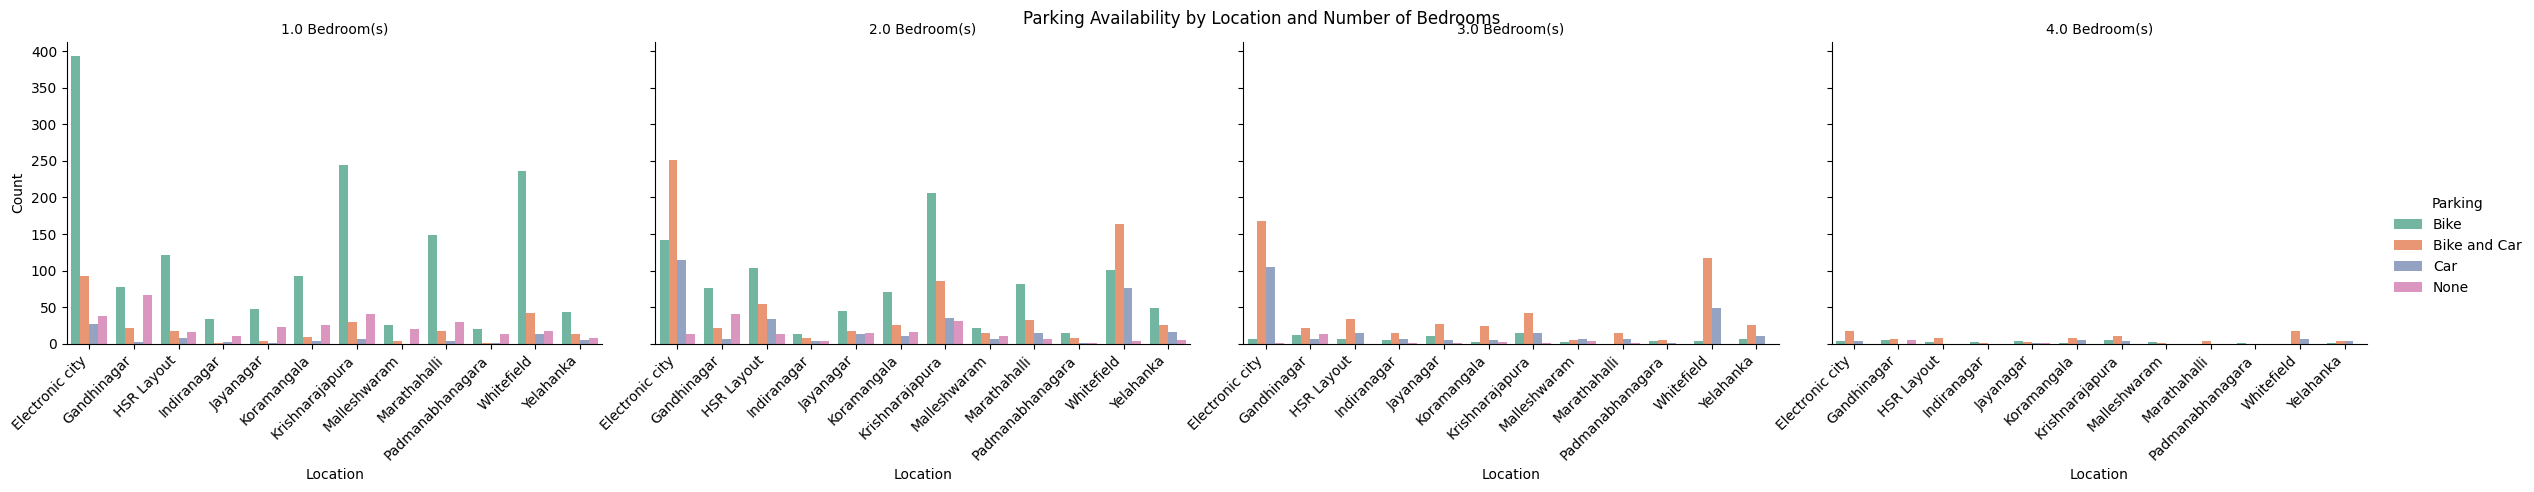

In [90]:
# Grouping the data by Location, No. of Bedroom, and Parking to count the availability
parking_availability = df_cleaned.groupby(['Location', 'No. of Bedroom', 'Parking']).size().reset_index(name='Count')

# Display the resulting DataFrame to see the counts
print(parking_availability)

# Visualization: Availability of Parking Types by Location and No. of Bedrooms
plt.figure(figsize=(20, 10))
sns.barplot(data=parking_availability, x='Location', y='Count', hue='Parking', palette='Set2', ci=None)

# Add facets for each number of bedrooms
g = sns.catplot(data=parking_availability, x='Location', y='Count', hue='Parking', col='No. of Bedroom', 
                kind='bar', height=4, aspect=1.5, palette='Set2', ci=None)
g.set_xticklabels(rotation=45, ha='right')
g.set_titles("{col_name} Bedroom(s)")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Parking Availability by Location and Number of Bedrooms')

plt.show()

            Location  No. of Bedroom       Parking  Count
0    Electronic city             1.0          Bike    393
1    Electronic city             1.0  Bike and Car     92
2    Electronic city             1.0           Car     27
3    Electronic city             1.0          None     38
4    Electronic city             2.0          Bike    142
..               ...             ...           ...    ...
162        Yelahanka             3.0  Bike and Car     25
163        Yelahanka             3.0           Car     11
164        Yelahanka             4.0          Bike      1
165        Yelahanka             4.0  Bike and Car      4
166        Yelahanka             4.0           Car      3

[167 rows x 4 columns]


C:\Users\Dell\AppData\Local\Temp\ipykernel_8564\2194720632.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=parking_availability, x='Location', y='Count', hue='Parking', palette='Set2', ci=None)
C:\Users\Dell\AppData\Local\Temp\ipykernel_8564\2194720632.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(


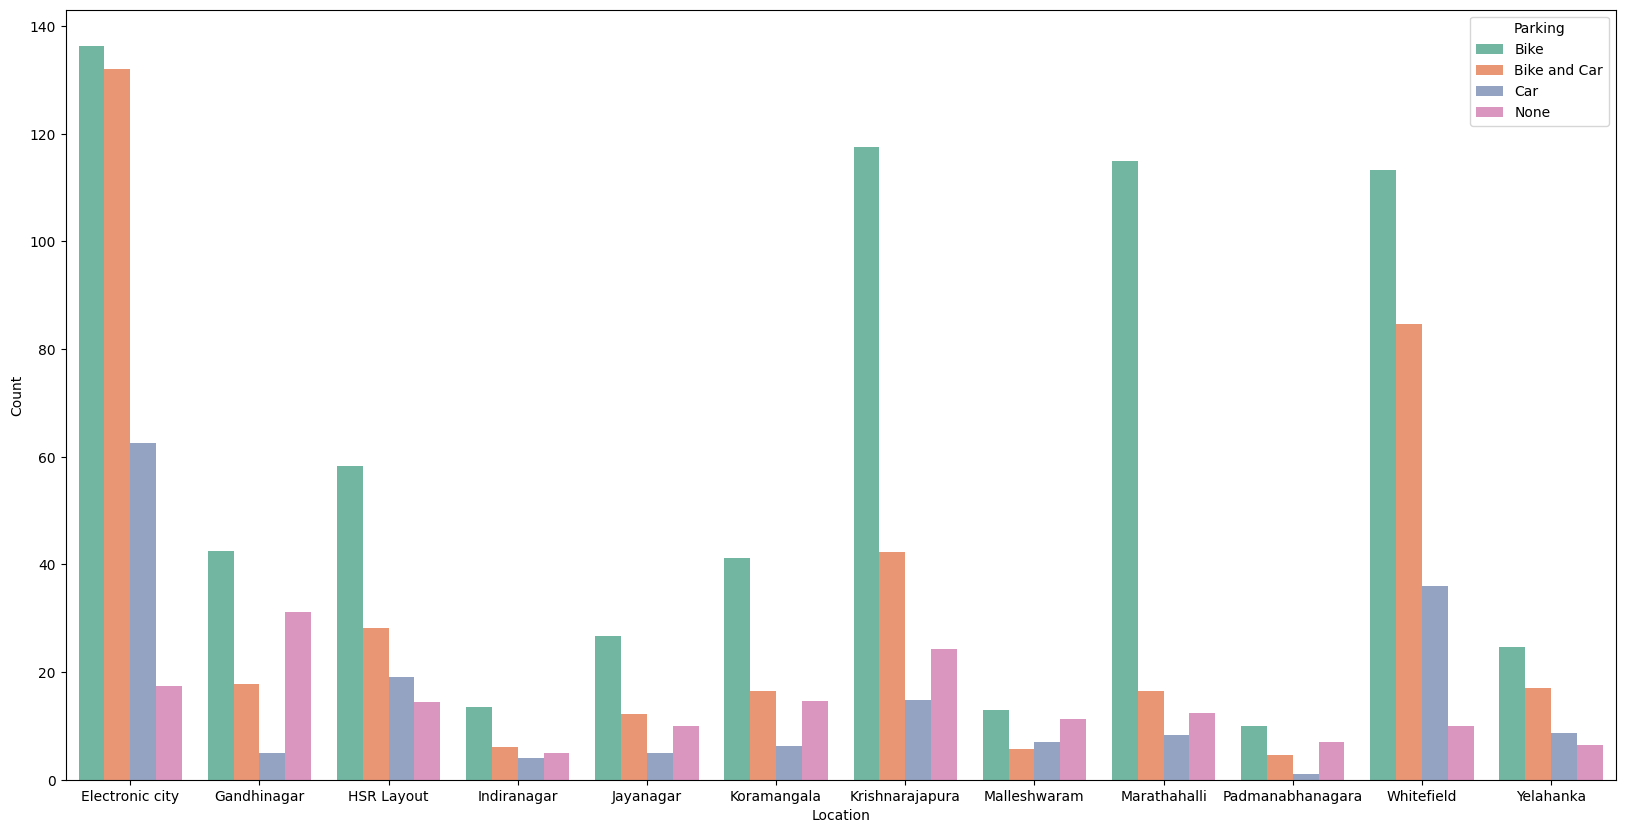

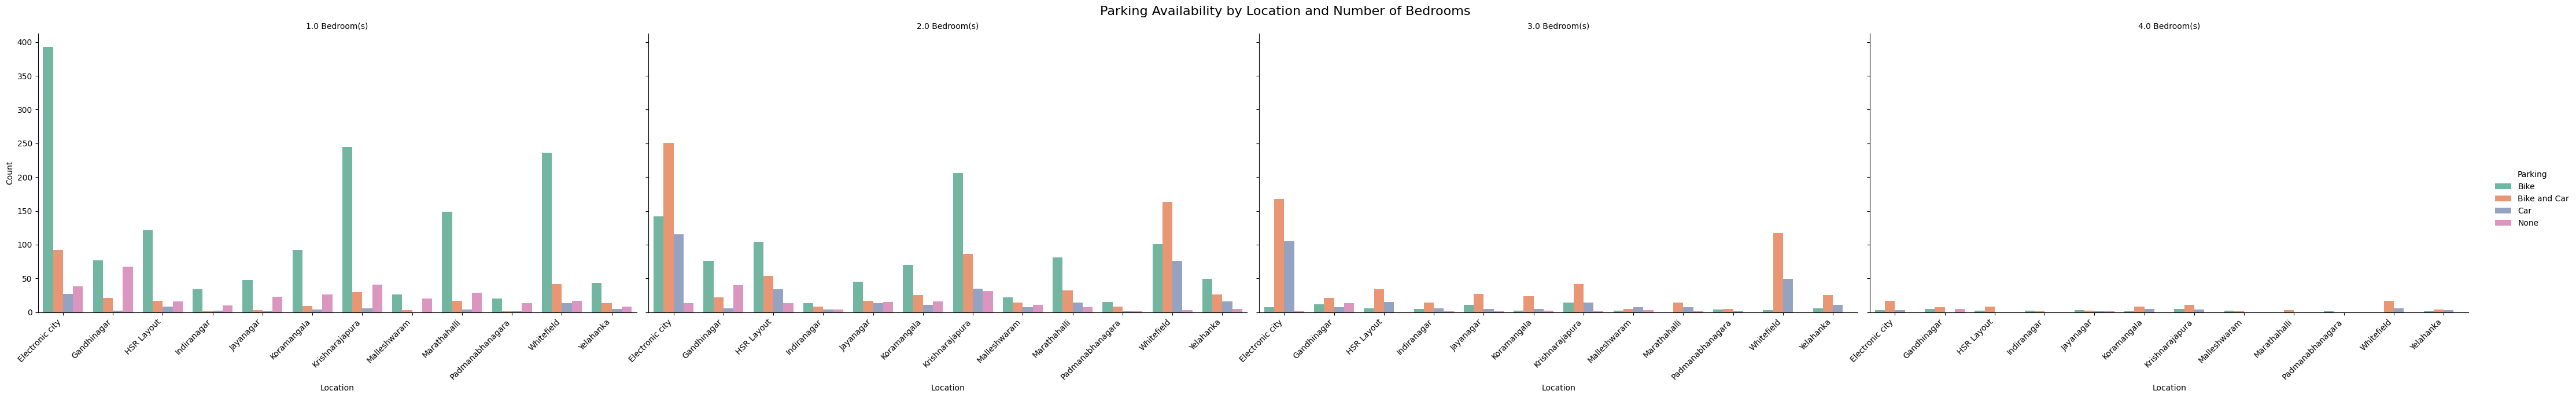

In [91]:
# Grouping the data by Location, No. of Bedroom, and Parking to count the availability
parking_availability = df_cleaned.groupby(['Location', 'No. of Bedroom', 'Parking']).size().reset_index(name='Count')

# Display the resulting DataFrame to see the counts
print(parking_availability)

# Visualization: Availability of Parking Types by Location and No. of Bedrooms
plt.figure(figsize=(20, 10))
sns.barplot(data=parking_availability, x='Location', y='Count', hue='Parking', palette='Set2', ci=None)

# Adjusting the size for larger room type visualizations
g = sns.catplot(
    data=parking_availability, 
    x='Location', 
    y='Count', 
    hue='Parking', 
    col='No. of Bedroom', 
    kind='bar', 
    height=6,  # Increase the height of each facet
    aspect=1.8,  # Increase the aspect ratio for wider facets
    palette='Set2', 
    ci=None
)
g.set_xticklabels(rotation=45, ha='right')
g.set_titles("{col_name} Bedroom(s)")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Parking Availability by Location and Number of Bedrooms', fontsize=16)

plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_8564\3147939080.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(


<Figure size 2000x1000 with 0 Axes>

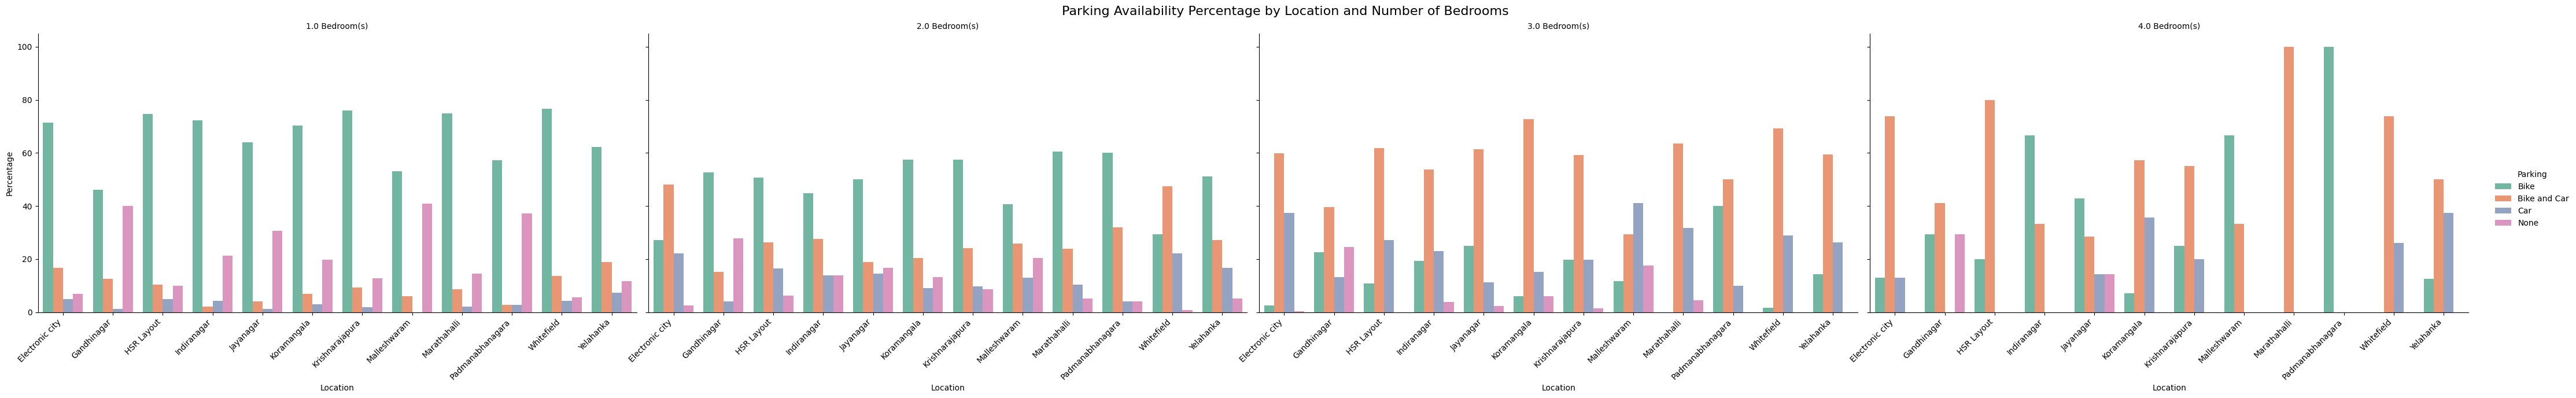

In [92]:
# Grouping the data by Location, No. of Bedroom, and Parking to count the availability
parking_availability = df_cleaned.groupby(['Location', 'No. of Bedroom', 'Parking']).size().reset_index(name='Count')

# Calculate the total counts for each Location and No. of Bedroom combination
total_counts = df_cleaned.groupby(['Location', 'No. of Bedroom']).size().reset_index(name='Total')

# Merge the total counts back into the parking availability data
parking_availability = pd.merge(parking_availability, total_counts, on=['Location', 'No. of Bedroom'])

# Calculate the percentage of each parking type
parking_availability['Percentage'] = (parking_availability['Count'] / parking_availability['Total']) * 100

# Visualization: Percentage Availability of Parking Types by Location and No. of Bedrooms
plt.figure(figsize=(20, 10))

# Adjusting the size for larger room type visualizations
g = sns.catplot(
    data=parking_availability, 
    x='Location', 
    y='Percentage',  # Use the percentage for the y-axis
    hue='Parking', 
    col='No. of Bedroom', 
    kind='bar', 
    height=6,  # Increase the height of each facet
    aspect=1.8,  # Increase the aspect ratio for wider facets
    palette='Set2', 
    ci=None
)
g.set_xticklabels(rotation=45, ha='right')
g.set_titles("{col_name} Bedroom(s)")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Parking Availability Percentage by Location and Number of Bedrooms', fontsize=16)

plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_8564\1722513907.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
C:\Users\Dell\AppData\Local\Temp\ipykernel_8564\1722513907.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
C:\Users\Dell\AppData\Local\Temp\ipykernel_8564\1722513907.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
C:\Users\Dell\AppData\Local\Temp\ipykernel_8564\1722513907.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')


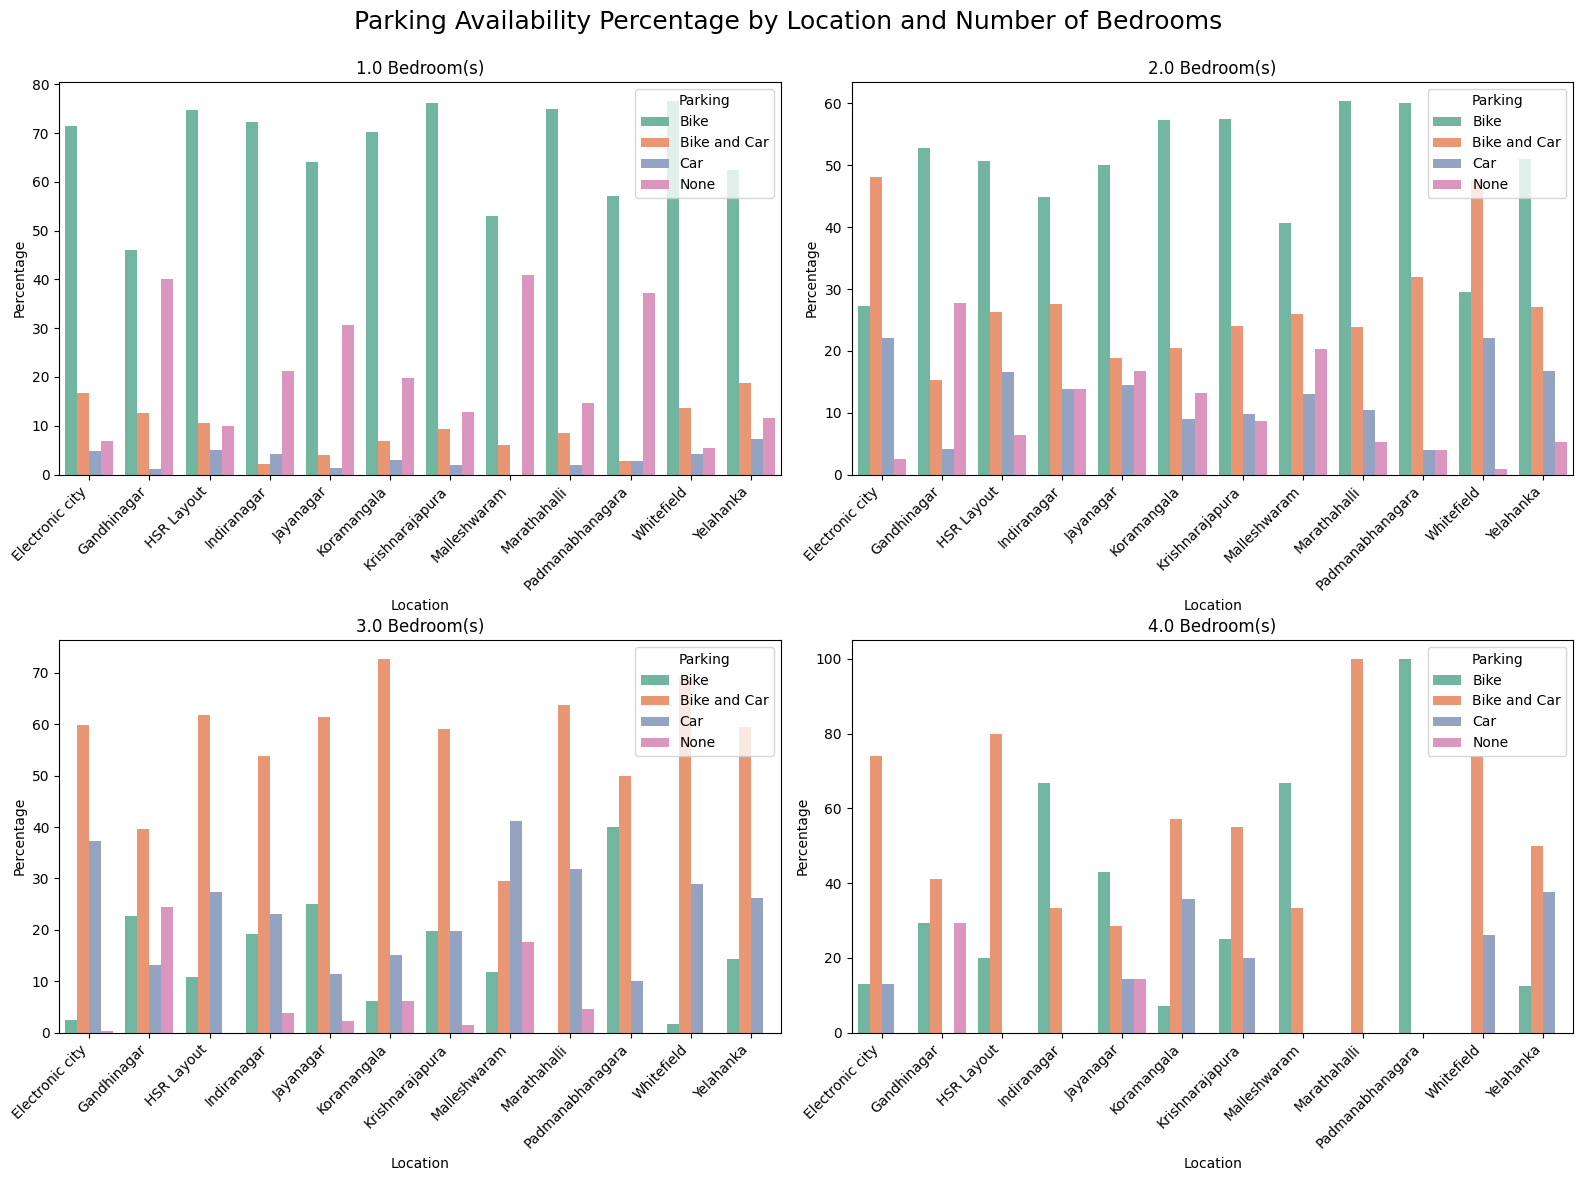

In [93]:
# Grouping the data by Location, No. of Bedroom, and Parking to count the availability
parking_availability = df_cleaned.groupby(['Location', 'No. of Bedroom', 'Parking']).size().reset_index(name='Count')

# Calculate the total counts for each Location and No. of Bedroom combination
total_counts = df_cleaned.groupby(['Location', 'No. of Bedroom']).size().reset_index(name='Total')

# Merge the total counts back into the parking availability data
parking_availability = pd.merge(parking_availability, total_counts, on=['Location', 'No. of Bedroom'])

# Calculate the percentage of each parking type
parking_availability['Percentage'] = (parking_availability['Count'] / parking_availability['Total']) * 100

# Get unique room types
room_types = parking_availability['No. of Bedroom'].unique()

# Set up the figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # 2x2 grid for subplots
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Plot each room type in its respective subplot
for i, room_type in enumerate(room_types):
    sns.barplot(
        data=parking_availability[parking_availability['No. of Bedroom'] == room_type],
        x='Location', 
        y='Percentage', 
        hue='Parking', 
        palette='Set2', 
        ax=axes[i]
    )
    axes[i].set_title(f'{room_type} Bedroom(s)')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
    axes[i].set_ylabel('Percentage')

# Adjust layout and show the plot
plt.tight_layout()
plt.suptitle('Parking Availability Percentage by Location and Number of Bedrooms', fontsize=18)
plt.subplots_adjust(top=0.92)  # Adjust space for the main title
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_8564\3706987689.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
C:\Users\Dell\AppData\Local\Temp\ipykernel_8564\3706987689.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
C:\Users\Dell\AppData\Local\Temp\ipykernel_8564\3706987689.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
C:\Users\Dell\AppData\Local\Temp\ipykernel_8564\3706987689.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')


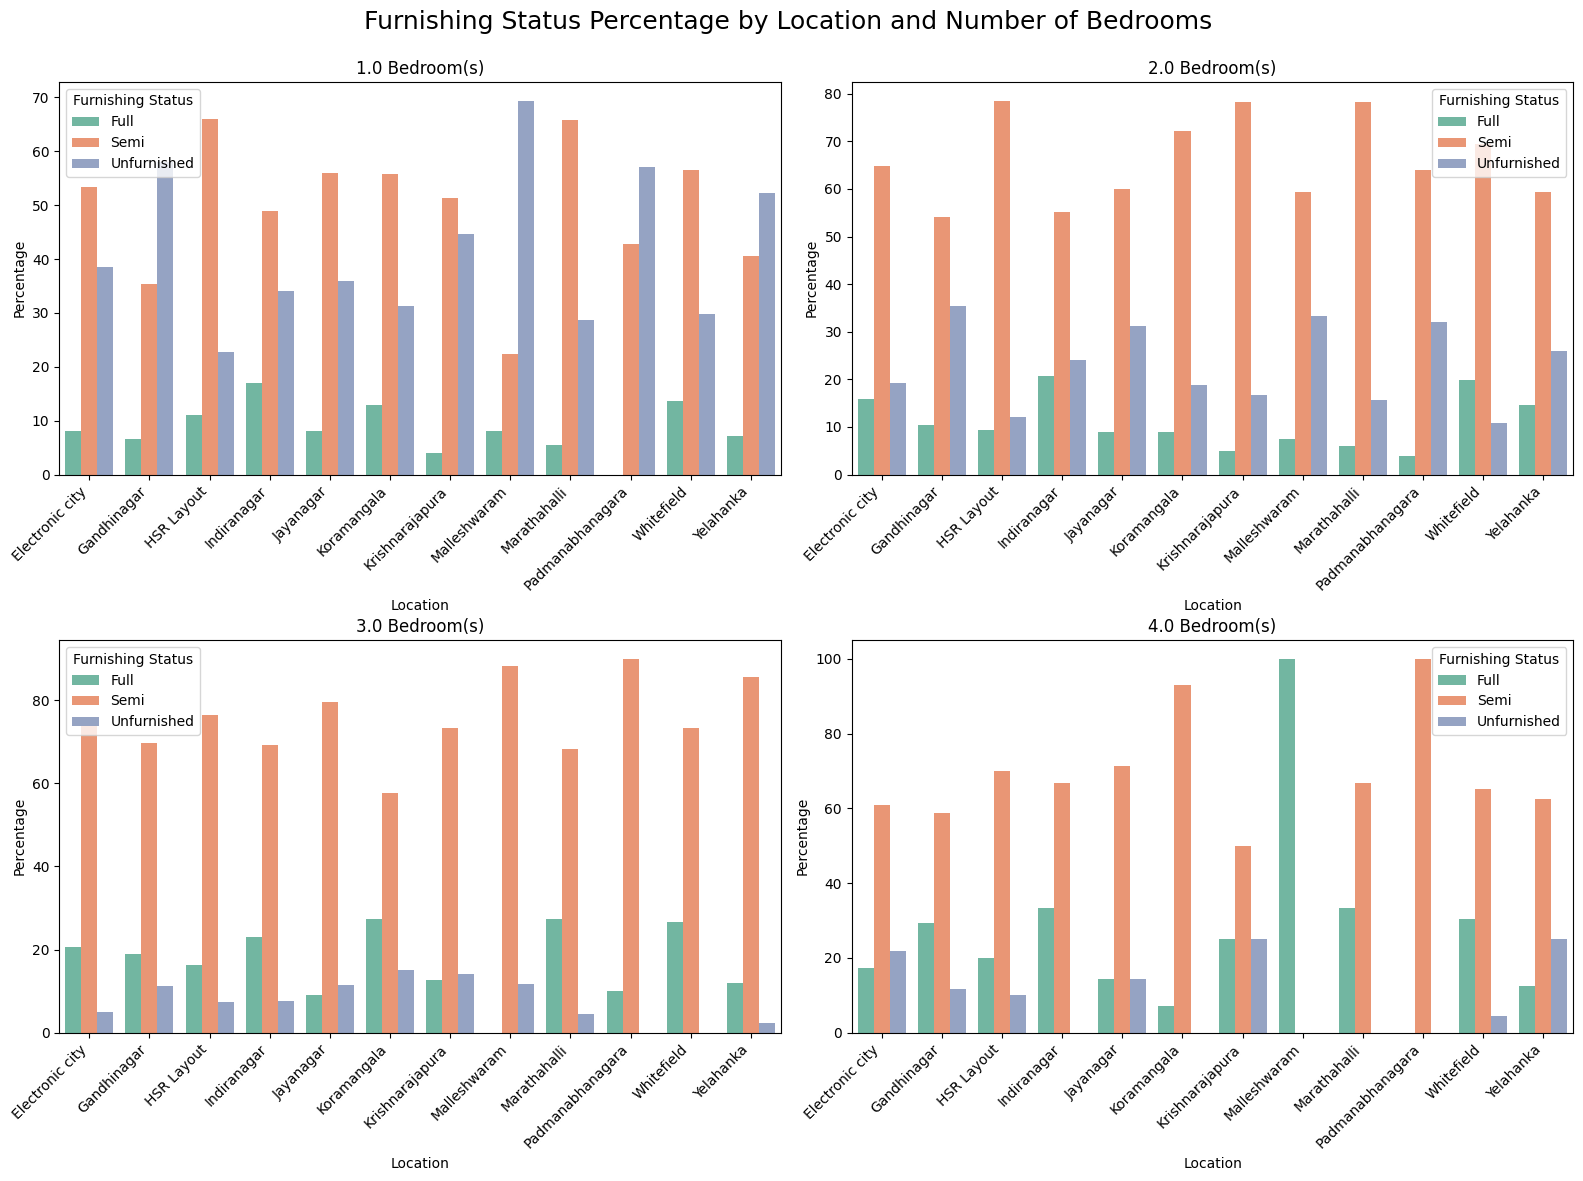

In [94]:
# Grouping the data by Location, No. of Bedroom, and Furnishing Status to count the availability
furnishing_availability = df_cleaned.groupby(['Location', 'No. of Bedroom', 'Furnishing Status']).size().reset_index(name='Count')

# Calculate the total counts for each Location and No. of Bedroom combination
total_counts = df_cleaned.groupby(['Location', 'No. of Bedroom']).size().reset_index(name='Total')

# Merge the total counts back into the furnishing availability data
furnishing_availability = pd.merge(furnishing_availability, total_counts, on=['Location', 'No. of Bedroom'])

# Calculate the percentage of each furnishing status
furnishing_availability['Percentage'] = (furnishing_availability['Count'] / furnishing_availability['Total']) * 100

# Get unique room types
room_types = furnishing_availability['No. of Bedroom'].unique()

# Set up the figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # 2x2 grid for subplots
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Plot each room type in its respective subplot
for i, room_type in enumerate(room_types):
    sns.barplot(
        data=furnishing_availability[furnishing_availability['No. of Bedroom'] == room_type],
        x='Location', 
        y='Percentage', 
        hue='Furnishing Status', 
        palette='Set2', 
        ax=axes[i]
    )
    axes[i].set_title(f'{room_type} Bedroom(s)')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
    axes[i].set_ylabel('Percentage')

# Adjust layout and show the plot
plt.tight_layout()
plt.suptitle('Furnishing Status Percentage by Location and Number of Bedrooms', fontsize=18)
plt.subplots_adjust(top=0.92)  # Adjust space for the main title
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_8564\836502354.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
C:\Users\Dell\AppData\Local\Temp\ipykernel_8564\836502354.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
C:\Users\Dell\AppData\Local\Temp\ipykernel_8564\836502354.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
C:\Users\Dell\AppData\Local\Temp\ipykernel_8564\836502354.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')


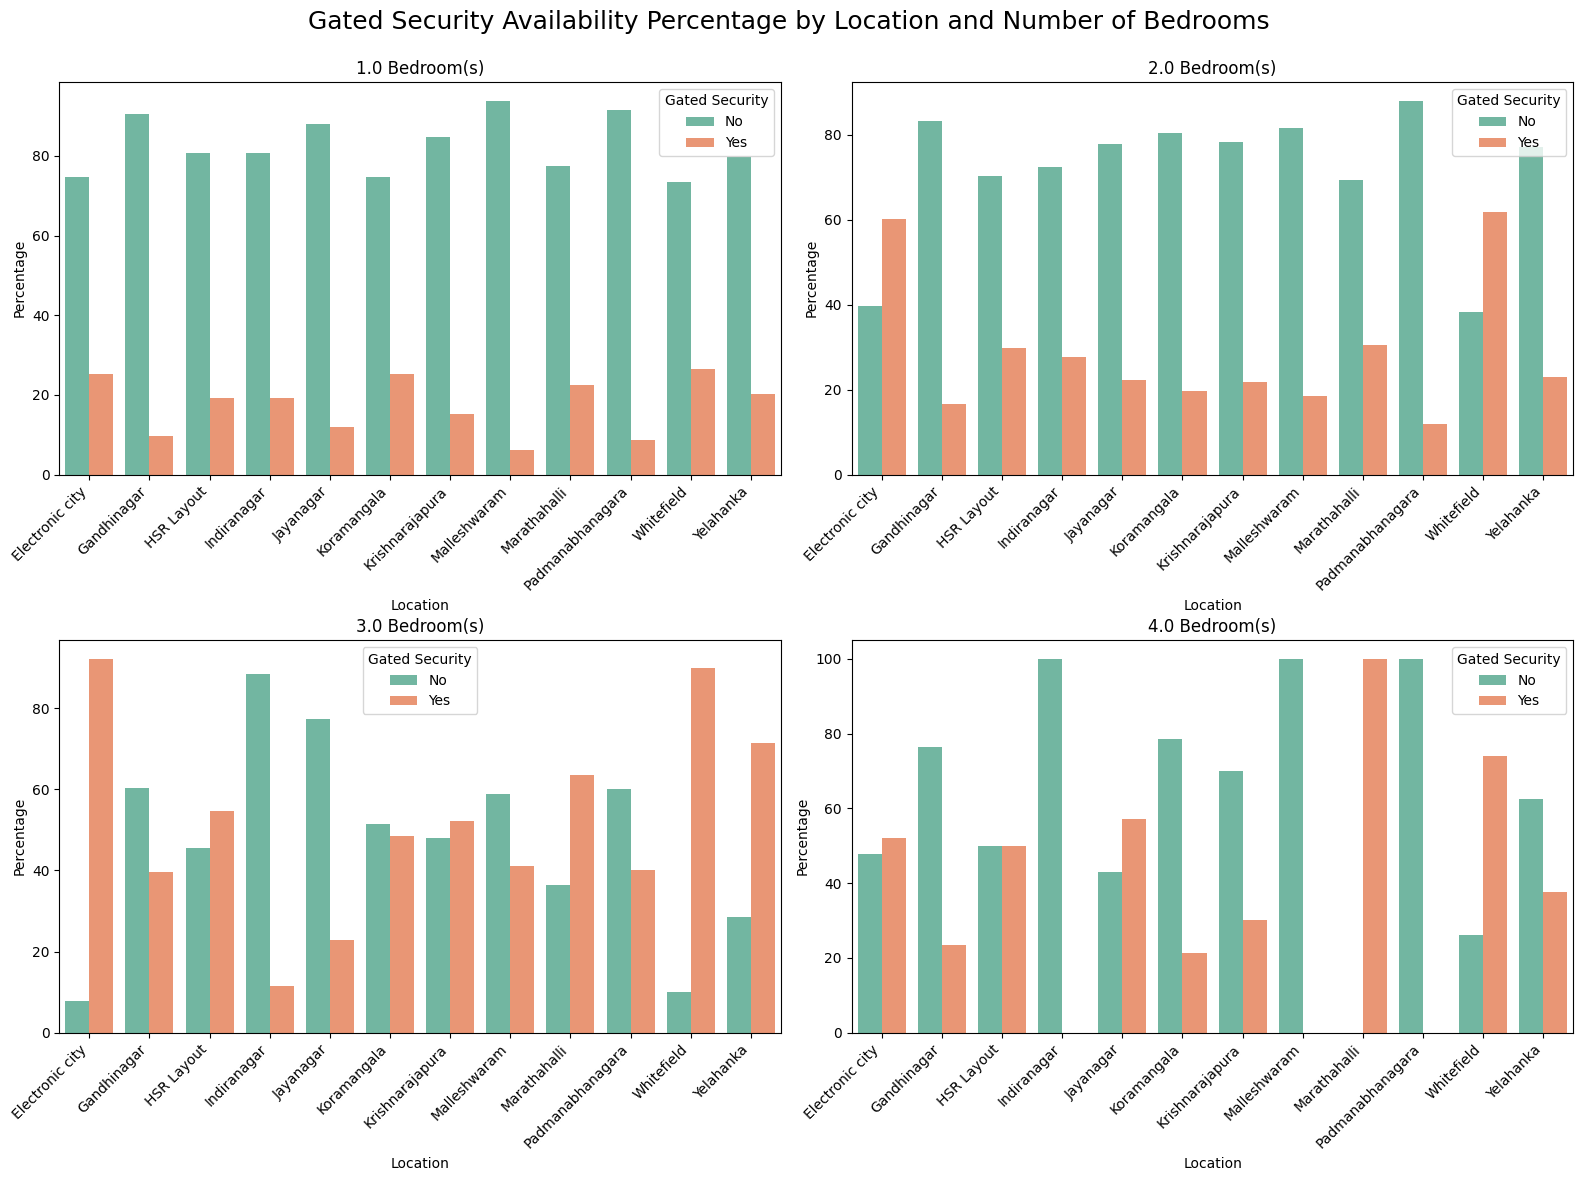

In [95]:
# Grouping the data by Location, No. of Bedroom, and Gated Security to count the availability
gated_security_availability = df_cleaned.groupby(['Location', 'No. of Bedroom', 'Gated Security']).size().reset_index(name='Count')

# Calculate the total counts for each Location and No. of Bedroom combination
total_counts = df_cleaned.groupby(['Location', 'No. of Bedroom']).size().reset_index(name='Total')

# Merge the total counts back into the gated security availability data
gated_security_availability = pd.merge(gated_security_availability, total_counts, on=['Location', 'No. of Bedroom'])

# Calculate the percentage of each gated security status
gated_security_availability['Percentage'] = (gated_security_availability['Count'] / gated_security_availability['Total']) * 100

# Get unique room types
room_types = gated_security_availability['No. of Bedroom'].unique()

# Set up the figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # 2x2 grid for subplots
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Plot each room type in its respective subplot
for i, room_type in enumerate(room_types):
    sns.barplot(
        data=gated_security_availability[gated_security_availability['No. of Bedroom'] == room_type],
        x='Location', 
        y='Percentage', 
        hue='Gated Security', 
        palette='Set2', 
        ax=axes[i]
    )
    axes[i].set_title(f'{room_type} Bedroom(s)')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
    axes[i].set_ylabel('Percentage')

# Adjust layout and show the plot
plt.tight_layout()
plt.suptitle('Gated Security Availability Percentage by Location and Number of Bedrooms', fontsize=18)
plt.subplots_adjust(top=0.92)  # Adjust space for the main title
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_8564\32539372.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Dell\AppData\Local\Temp\ipykernel_8564\32539372.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
C:\Users\Dell\AppData\Local\Temp\ipykernel_8564\32539372.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Dell\AppData\Local\Temp\ipykernel_8564\32539372.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
C:\Users\Dell\AppData\Local\Temp\ipykernel

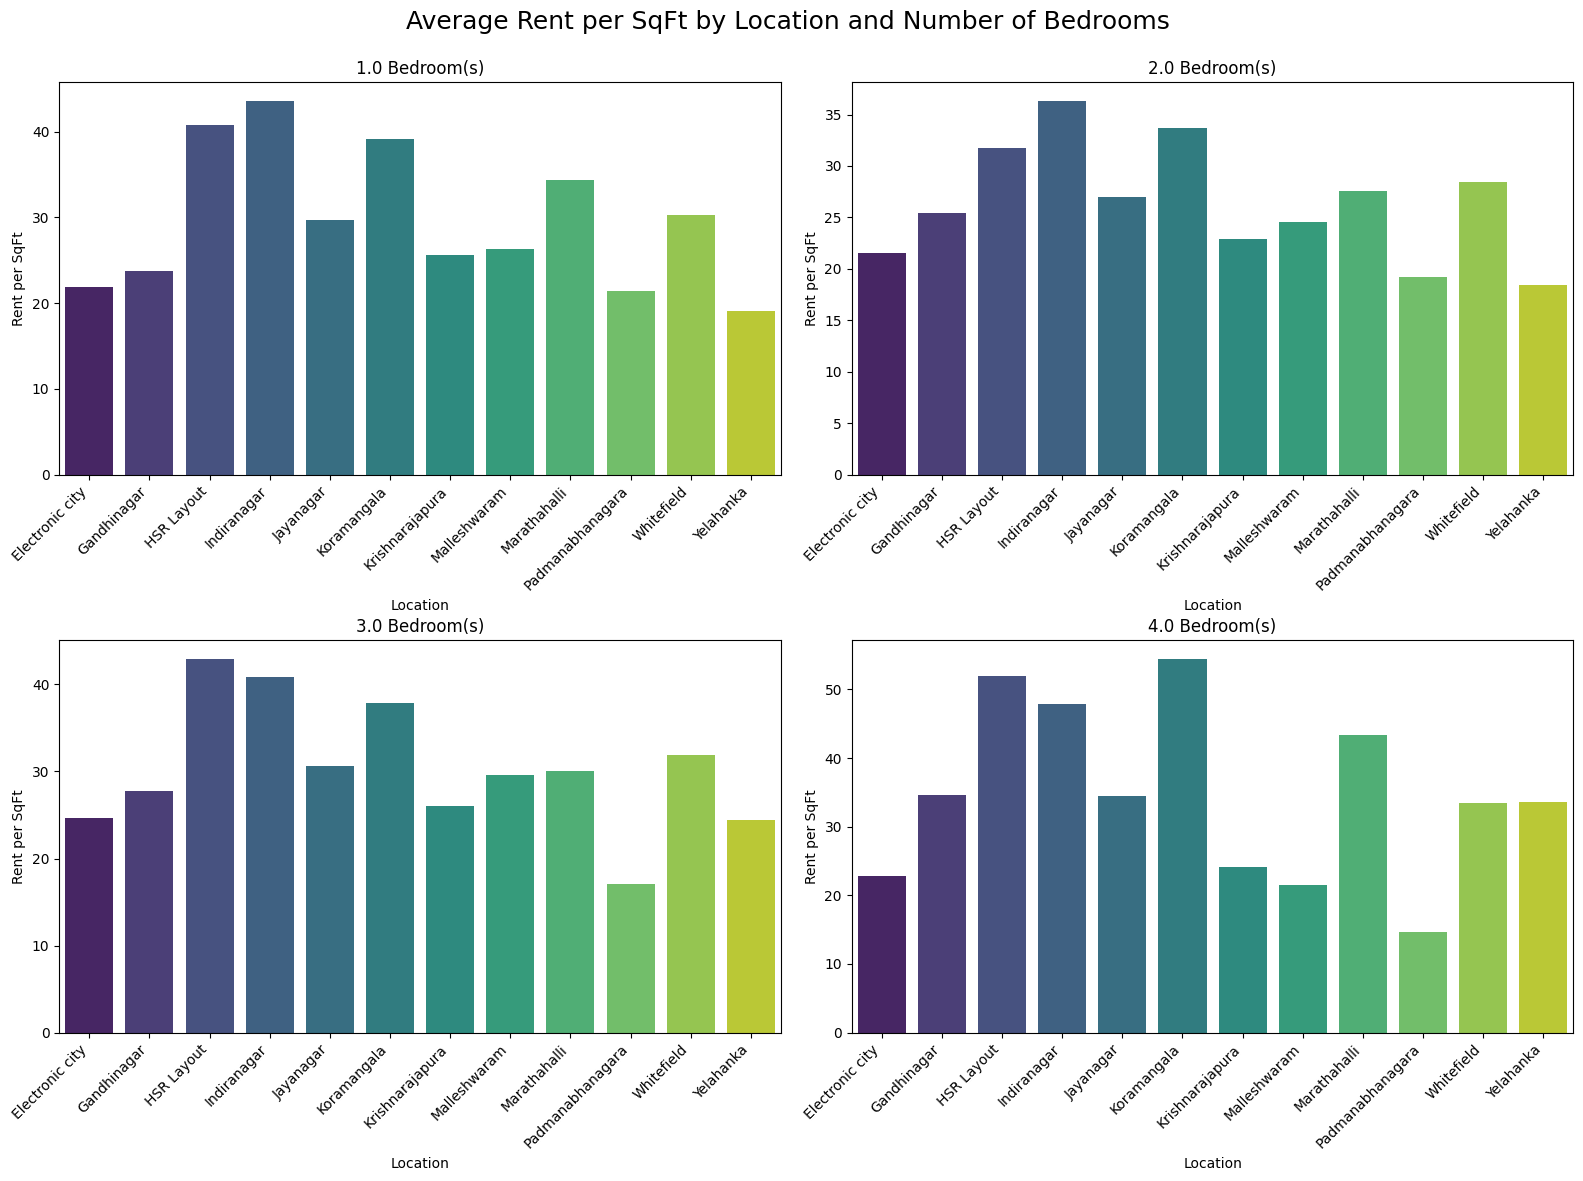

In [96]:
# Group by Location and No. of Bedroom and calculate the average Rent per SqFt
rent_per_sqft = df_cleaned.groupby(['Location', 'No. of Bedroom']).apply(
    lambda x: (x['Rent'] / x['Total SqFt']).mean()
).reset_index(name='Rent per SqFt')

# Get unique room types
room_types = rent_per_sqft['No. of Bedroom'].unique()

# Set up the figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))  # 2x2 grid for subplots
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Plot each room type in its respective subplot
for i, room_type in enumerate(room_types):
    sns.barplot(
        data=rent_per_sqft[rent_per_sqft['No. of Bedroom'] == room_type],
        x='Location', 
        y='Rent per SqFt', 
        palette='viridis', 
        ax=axes[i]
    )
    axes[i].set_title(f'{room_type} Bedroom(s)')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
    axes[i].set_ylabel('Rent per SqFt')

# Adjust layout and show the plot
plt.tight_layout()
plt.suptitle('Average Rent per SqFt by Location and Number of Bedrooms', fontsize=18)
plt.subplots_adjust(top=0.92)  # Adjust space for the main title
plt.show()